In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/raw/CVD_cleaned.csv")

In [4]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='str')

### Target Variable

In [5]:
heart_disease_yes = len(df[df["Heart_Disease"] == "Yes"])
heart_disease_no = len(df[df["Heart_Disease"] == "No"])
heart_disease_yes_pct = round((heart_disease_yes/len(df))*100,2)
heart_disease_no_pct = round((heart_disease_no/len(df))*100,2)
print(f"The number of people having heart disease is {heart_disease_yes} and constitute {heart_disease_yes_pct} of the data")
print(f"The number of people not having heart disease is {heart_disease_no} and constitute {heart_disease_no_pct} of the data")

The number of people having heart disease is 24971 and constitute 8.09 of the data
The number of people not having heart disease is 283883 and constitute 91.91 of the data


* The data is 8.09% positive and 91.91% negative
* This indicates severe class imbalance

### Duplicates

In [6]:
df.duplicated().sum()


np.int64(80)

In [7]:
duplicates_sum = df.duplicated().sum()
duplicates_pct = round((duplicates_sum/len(df)) * 100,3)
print(f"Percentage of Duplicates : {duplicates_pct}%")

Percentage of Duplicates : 0.026%


In [8]:
duplicates = df.duplicated()
df[duplicates]["Heart_Disease"].value_counts()

Heart_Disease
No    80
Name: count, dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

### Numerical Features investigation

In [10]:
numerical_cols = ['Height_(cm)','Weight_(kg)','BMI','Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Alcohol_Consumption']
stats = df[numerical_cols].describe().T
median = df[numerical_cols].median()
skew = df[numerical_cols].skew()
stats["median"] = df[numerical_cols].median()
stats["skew"] = skew
stats


,count,mean,std,min,25%,50%,75%,max,median,skew
Height_(cm),308774.0,170.615220,10.658452,91.00,163.00,170.00,178.00,241.00,170.00,0.015299
Weight_(kg),308774.0,83.590399,21.344664,24.95,68.04,81.65,95.25,293.02,81.65,1.058099
BMI,308774.0,28.626813,6.522810,12.02,24.21,27.44,31.85,99.33,27.44,1.376452
Fruit_Consumption,308774.0,29.834290,24.877812,0.00,12.00,30.00,30.00,120.00,30.00,1.248447
Green_Vegetables_Consumption,308774.0,15.109517,14.926912,0.00,4.00,12.00,20.00,128.00,12.00,2.415920
FriedPotato_Consumption,308774.0,6.297237,8.583837,0.00,2.00,4.00,8.00,128.00,4.00,4.911907
Alcohol_Consumption,308774.0,5.097557,8.200434,0.00,0.00,1.00,6.00,30.00,1.00,1.885261


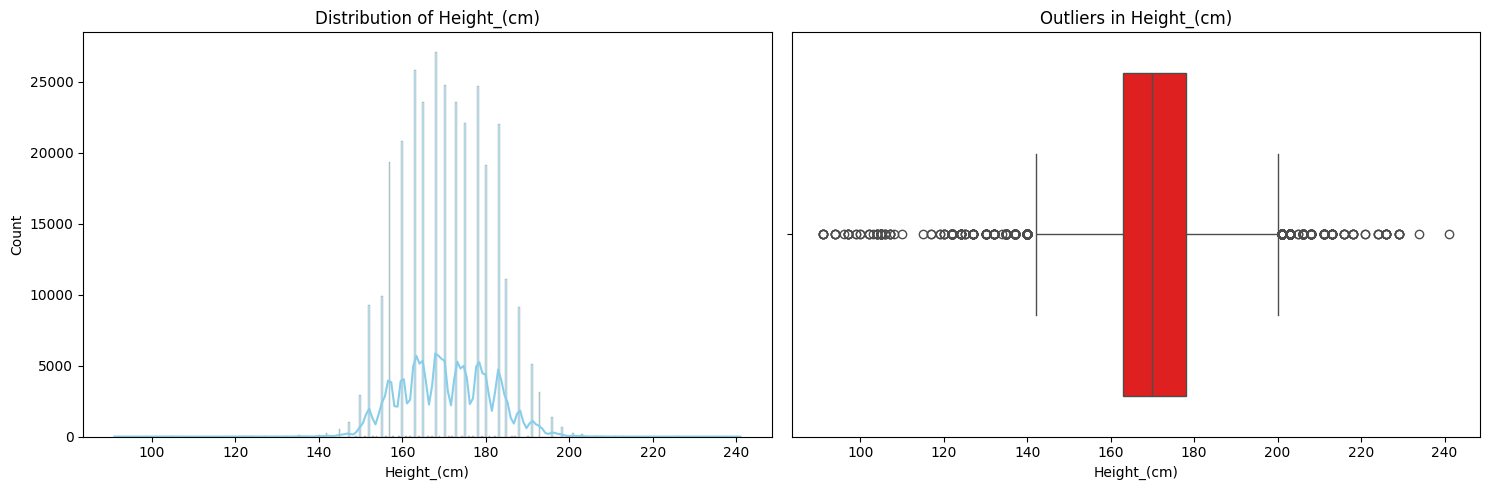

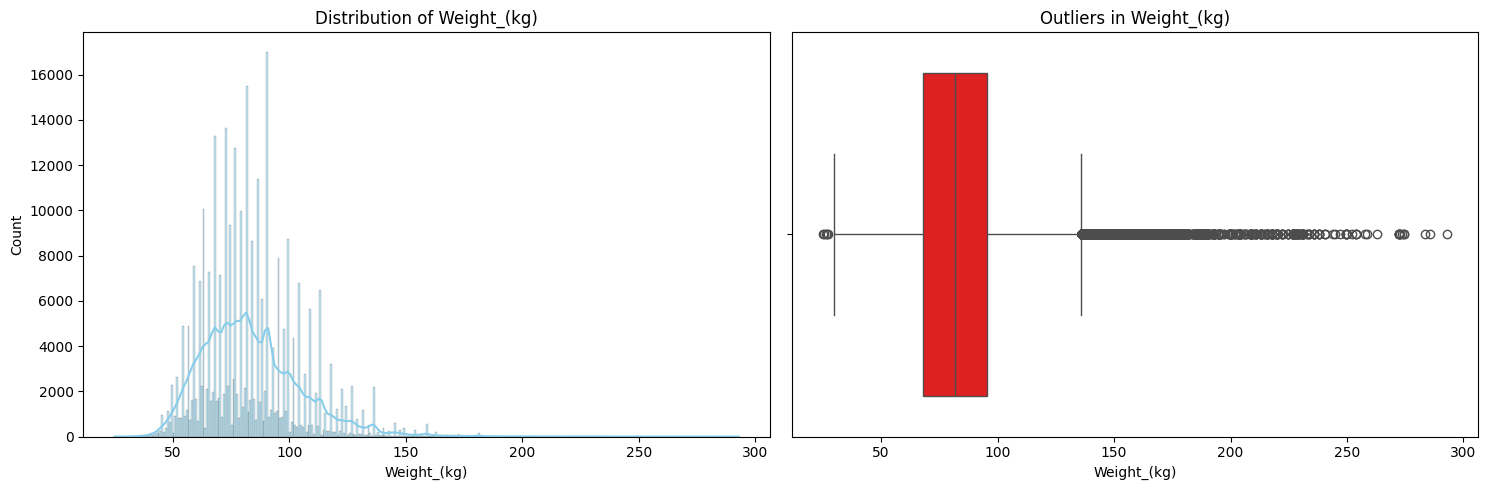

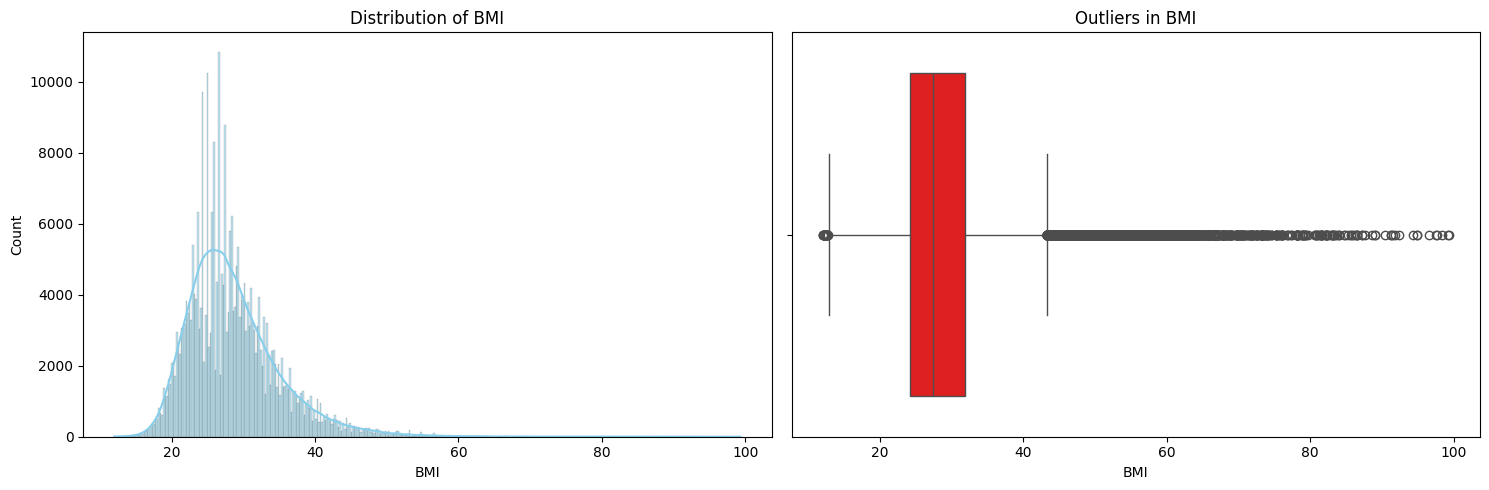

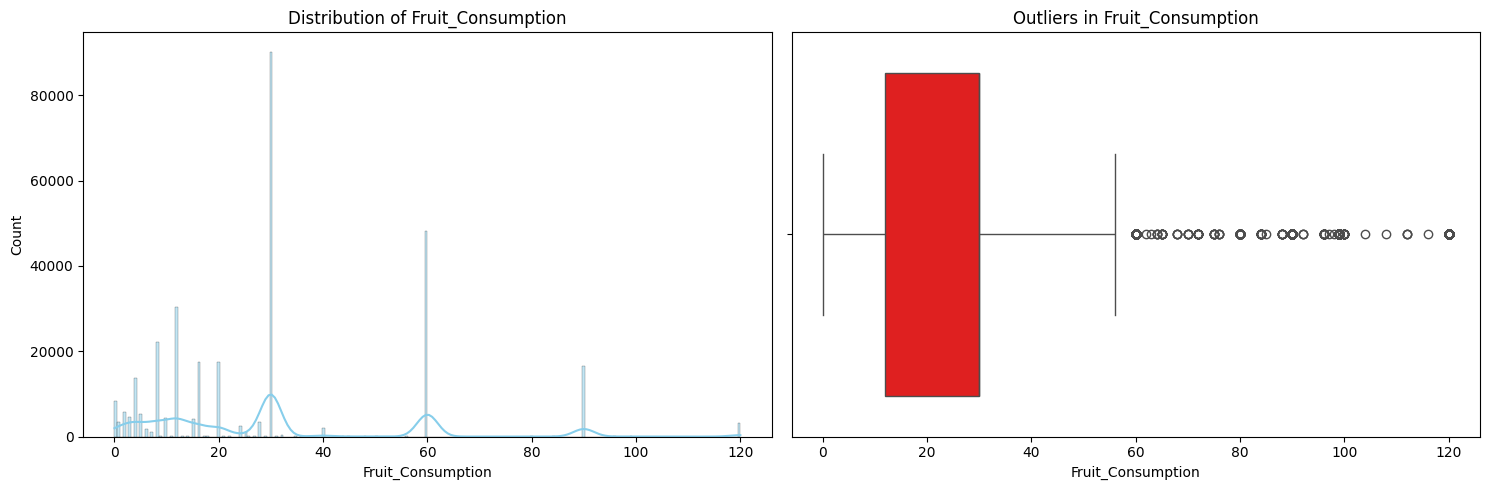

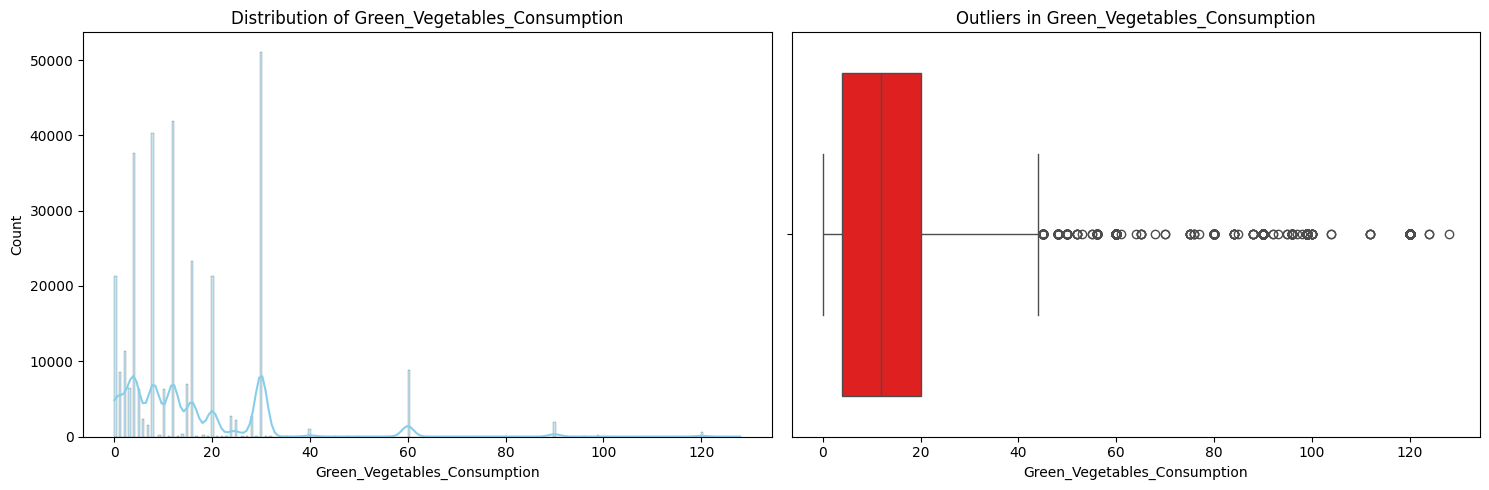

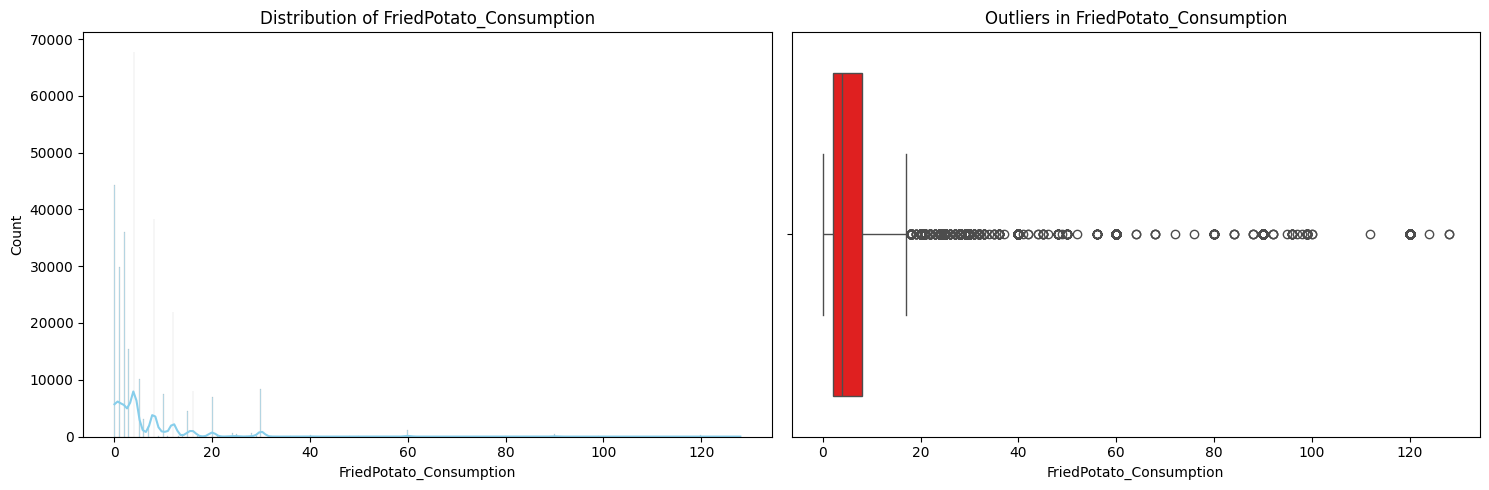

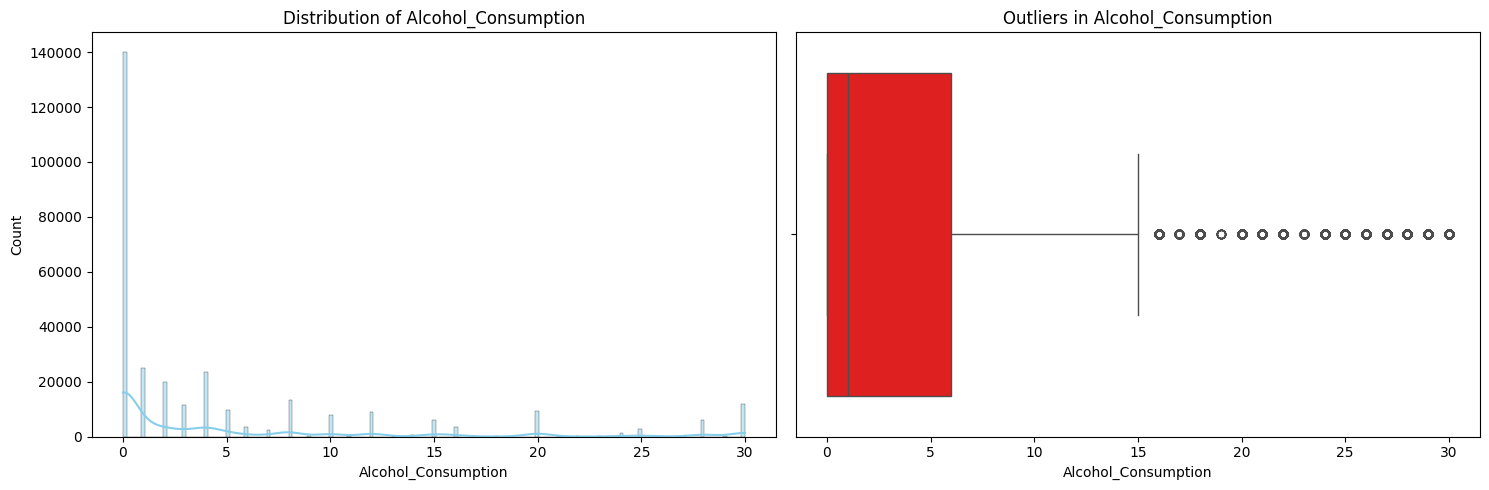

In [11]:
for col in numerical_cols:
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    sns.histplot(data=df,x=col,kde=True,ax=axes[0],color='skyblue')
    axes[0].set_title(f'Distribution of {col}')
    sns.boxplot(data=df,x=col,ax=axes[1],color='red')
    axes[1].set_title(f'Outliers in {col}')
    plt.tight_layout()
    plt.show()